In [1]:
# -*- coding: utf-8 -*-
#Created on Sat Mar 17 17:11:14 2018
#@author: Alvi

import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import plotly




ModuleNotFoundError: No module named 'plotly'

In [43]:
# Data Import
car_price = pd.read_csv('CarPrice_Assignment.csv')
car_price.info()
car_price.shape
car_price.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
# Checking numerical values
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
# Create the companyname variable from Carname
car_price['companyname']=car_price['CarName'].str.split().str.get(0)
car_price=car_price.drop(['CarName'],axis=1)
car_price_backup=car_price
    

In [46]:
## Data Preparation 

###Creating Dummies
fueltype = pd.get_dummies(car_price['fueltype'],drop_first=True,prefix='fueltype')
aspiration = pd.get_dummies(car_price['aspiration'],drop_first=True,prefix='aspiration')
doornumber = pd.get_dummies(car_price['doornumber'],drop_first=True,prefix='doornumber')
enginelocation = pd.get_dummies(car_price['enginelocation'],drop_first=True,prefix='enginelocation')
symboling= pd.get_dummies(car_price['symboling'],drop_first=True ,prefix='symboling')
companyname = pd.get_dummies(car_price['companyname'],drop_first=True,prefix='companyname')
carbody = pd.get_dummies(car_price['carbody'],drop_first=True,prefix='carbody')
drivewheel = pd.get_dummies(car_price['drivewheel'],drop_first=True,prefix='drivewheel')
enginetype = pd.get_dummies(car_price['enginetype'],drop_first=True,prefix='enginetype')
cylindernumber = pd.get_dummies(car_price['cylindernumber'],drop_first=True,prefix='cylindernumber')
fuelsystem = pd.get_dummies(car_price['fuelsystem'],drop_first=True,prefix='fuelsystem')
 
### Adding all the dummy variables to car_price file
car_price = pd.concat([car_price,fueltype,aspiration,doornumber,enginelocation,symboling,companyname,carbody,drivewheel,enginetype,cylindernumber,fuelsystem],axis=1)
print(car_price.shape)
car_price = car_price.drop(['fueltype','aspiration','doornumber','enginelocation','symboling','companyname','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1)
print(car_price.shape)

(205, 87)
(205, 76)


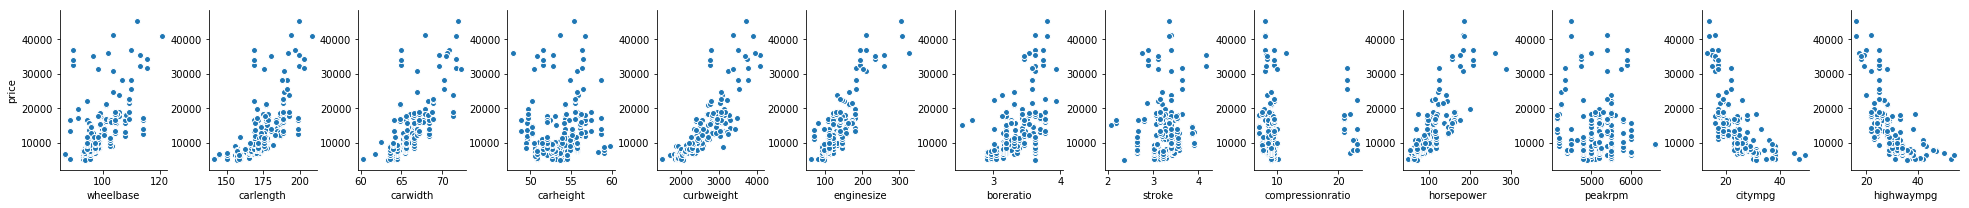

In [47]:
# selecting the numerical variables 
%matplotlib inline

car_num_vars=['wheelbase','carlength','carwidth','carheight','curbweight',
              'enginesize','boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
plt.figure(figsize = (25,15))
sns.pairplot(car_price, x_vars=car_num_vars[0:-1], y_vars='price',size=3, aspect=.7, kind='scatter')

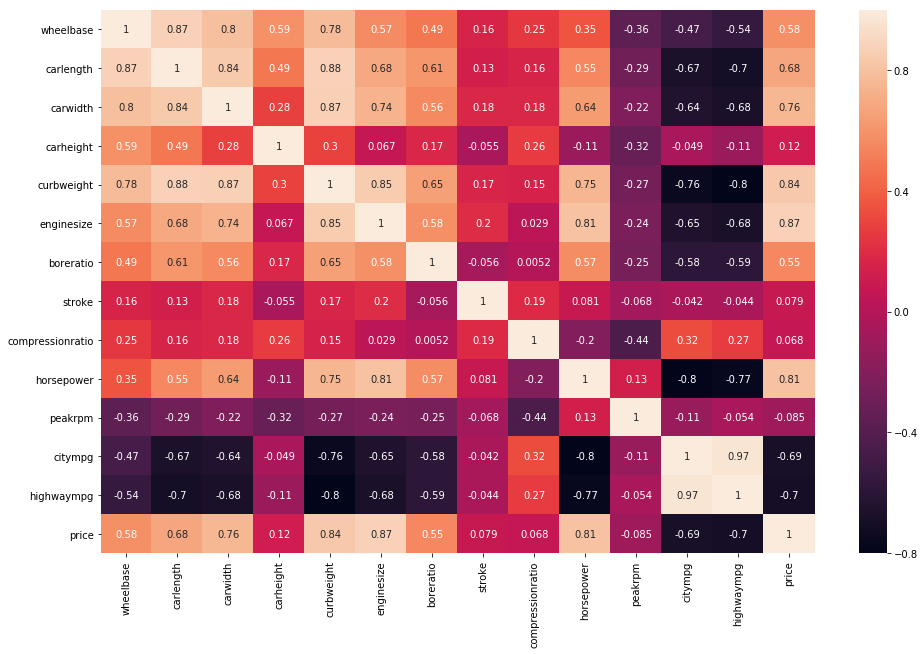

In [48]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(car_price[car_num_vars].corr(),annot = True)
#We can clearly see that price is highly correlated with curbweight,engine size and horsepower


In [49]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                          
                                              
# applying normalize ( ) to all columns 
car_price_norm = car_price.apply(normalize) 

In [50]:

y = car_price_norm['price']
print(y.shape)
X = car_price_norm
X=X.drop(['car_ID','price'],axis=1)
print(X.shape)


(205,)
(205, 74)


In [51]:
## Splitting test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size = 0.2, random_state=100)

In [52]:
# VIF function
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
###running a loop to get the best 30 variables before manually tweaking the models . In each pass,
##makaing sure that all variables having p value greater than .2 and vif greater than 20 is removed 
##This will ensure that we have a decent model to start with    
X_train_loop=X_train
for num in range(70,30,-1):
    lm = LinearRegression()
    rfe = RFE(lm, num)             
    rfe = rfe.fit(X_train_loop, y_train)
    print(X_train_loop.columns)
    print(rfe.support_)           
    col_list = X_train_loop.columns[rfe.support_]
     # Creating X_test dataframe with RFE selected variables
    X_train_rfe = X_train_loop[col_list]
    
    # Adding a constant variable 
    import statsmodels.api as sm  
    X_train_rfe['const']=1
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    #Let's see the summary of our linear model
    vif_values=vif_cal(input_data=car_price_norm[col_list.tolist() + ['price']], dependent_col="price")
    remove= X_train_rfe.columns[lm.pvalues>.2].tolist() + vif_values[vif_values.Vif > 20].Var.tolist()
    if 'const' in remove:
        remove.remove('const')
    if len(remove) > 0:
        X_train_loop.drop(remove,axis=1,inplace=True)
    else:
         pass

lm.summary()
print(vif_values)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'enginelocation_rear', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'companyname_alfa-romero',
       'companyname_audi', 'companyname_bmw', 'companyname_buick',
       'companyname_chevrolet', 'companyname_dodge', 'companyname_honda',
       'companyname_isuzu', 'companyname_jaguar', 'companyname_maxda',
       'companyname_mazda', 'companyname_mercury', 'companyname_mitsubishi',
       'companyname_nissan', 'companyname_peugeot', 'companyname_plymouth',
       'companyname_porcshce', 'companyname_porsche', 'companyname_renault',
       'companyname_saab', 'companyname_subaru', 'companyname_toyota',
       'companyname_toyouta', 'companyname_vokswagen',
       'companyname_volkswagen', 'companyname

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

Index(['carwidth', 'carheight', 'boreratio', 'stroke', 'peakrpm',
       'aspiration_turbo', 'symboling_-1', 'companyname_audi',
       'companyname_bmw', 'companyname_chevrolet', 'companyname_dodge',
       'companyname_honda', 'companyname_maxda', 'companyname_mitsubishi',
       'companyname_plymouth', 'companyname_porsche', 'companyname_saab',
       'companyname_volvo', 'carbody_hardtop', 'carbody_wagon',
       'drivewheel_fwd', 'cylindernumber_twelve', 'fuelsystem_2bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Index(['carwidth', 'carheight', 'stroke', 'symboling_-1', 'companyname_bmw',
       'companyname_mitsubishi', 'companyname_porsche', 'companyname_saab',
       'drivewheel_fwd', 'cylindernumber_twelve'],
      dtype='object')
[ True  True 

Index(['carwidth', 'carheight', 'stroke', 'symboling_-1', 'companyname_bmw',
       'companyname_mitsubishi', 'companyname_porsche', 'companyname_saab',
       'drivewheel_fwd', 'cylindernumber_twelve'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True]
Index(['carwidth', 'carheight', 'stroke', 'symboling_-1', 'companyname_bmw',
       'companyname_mitsubishi', 'companyname_porsche', 'companyname_saab',
       'drivewheel_fwd', 'cylindernumber_twelve'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True]
Index(['carwidth', 'carheight', 'stroke', 'symboling_-1', 'companyname_bmw',
       'companyname_mitsubishi', 'companyname_porsche', 'companyname_saab',
       'drivewheel_fwd', 'cylindernumber_twelve'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True]
Index(['carwidth', 'carheight', 'stroke', 'symboling_-1', 'companyname_bmw',
       'companyname_mitsubishi', 'companyname_porsche', 'co

In [55]:
######VIF is good for all removing variables having p value greater than .1. 
X_train_loop.drop(['companyname_mitsubishi'],axis=1,inplace=True)
X_train_loop['const']=1
lm = sm.OLS(y_train,X_train_loop).fit()
print(lm.summary())
##Now p values are less than .09


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     78.70
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           4.77e-53
Time:                        16:02:45   Log-Likelihood:                 180.60
No. Observations:                 164   AIC:                            -341.2
Df Residuals:                     154   BIC:                            -310.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
carwidth                  0.55

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
###Checking Vif again. Every value looks good
var_list=X_train_loop.columns.tolist() + ['price']
var_list.remove('const')
vif_values=vif_cal(input_data=car_price_norm[var_list], dependent_col="price")
print(vif_values)

                     Var   Vif
0               carwidth  1.74
7         drivewheel_fwd  1.57
1              carheight  1.36
2                 stroke  1.27
3           symboling_-1  1.21
6       companyname_saab  1.15
8  cylindernumber_twelve  1.13
5    companyname_porsche  1.11
4        companyname_bmw  1.10


In [57]:
# Making predictions on test
var_list.remove('price')
X_test_loop = X_test[var_list]
X_test_loop['const']=1
y_pred = lm.predict(X_test_loop)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'car_price')

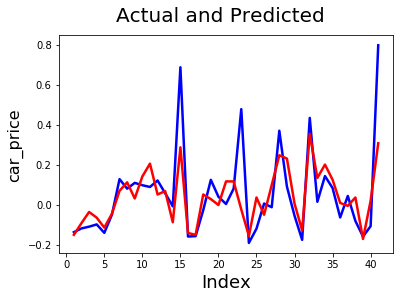

In [58]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,42,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('car_price', fontsize=16) 


Text(0,0.5,'Index')

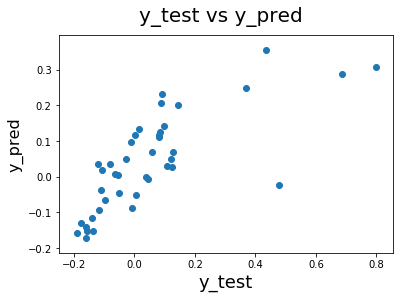

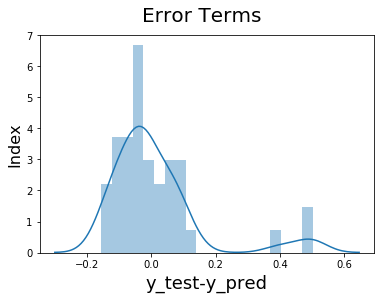

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    


# Plotting the error terms to understand the distribution.Errors are gaussian
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=20)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)

In [60]:
###Checking RMSE. 
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.146025160459
